In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [57]:
import numpy as np
import pandas as pd
cpath = "/content/drive/My Drive/Study/12th Sem/Data Mining/Lab/15-10-19/"
data = pd.read_csv(cpath+"HCV-Egy-Data.csv")
data.head()


,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,7425,4248807.0,14,112132.0,99,84,52.0,109,81,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,12101,4429425.0,10,129367.0,91,123,95.0,75,113,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,4178,4621191.0,12,151522.0,113,49,95.0,107,116,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,6490,4794631.0,10,146457.0,43,64,109.0,80,88,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,3661,4606375.0,11,187684.0,99,104,67.0,48,120,94,90,30,660410,738756,3731527,338946,242861,11,1


In [76]:
#finding 5 columns that have strong correllation with class attribute
cr = data.corr()
columns = data.columns 
#print(columns)
#print(cr)
dict = {}
indx = 0
for i in cr['Baselinehistological staging']:
    dict[columns[indx]] = abs(i)
    indx = indx +1

import operator
sorted_dict = sorted(dict.items(), key=operator.itemgetter(1))
#for i in sorted_dict:
#    print("{}              {}".format(i[0], i[1]))

s = len(sorted_dict)
selected_columns = []
for i in range(s-2, s-7, -1):
    selected_columns.append(sorted_dict[i][0])

#print("Selected Columns: ")
print(selected_columns)


['BMI', 'Nausea/Vomting', 'Epigastric pain ', 'Baseline histological Grading', 'ALT 1']


In [105]:
selected_data = data[selected_columns+['Baselinehistological staging']].copy()
selected_data.head()

,BMI,Nausea/Vomting,Epigastric pain,Baseline histological Grading,ALT 1,Baselinehistological staging
0,35,1,2,13,84,2
1,29,2,1,4,123,2
2,33,2,1,4,49,4
3,33,2,1,10,64,3
4,32,1,2,11,104,1


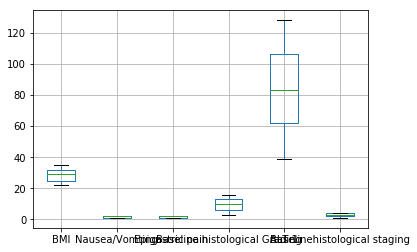

In [100]:
selected_data.boxplot()

In [101]:
#Removing Outlier

for i in selected_columns:
    p5 = np.percentile(selected_data[i],5)
    p95 = np.percentile(selected_data[i],95)
    indx = 0
    print("{}  size  {}".format(i, len(selected_data[i])))
    for j in selected_data[i]:
        try:
            if j <= p5 or j >= p95:
                selected_data.drop(selected_data.index[indx], inplace=True)
        except:
            pass
            #print("In {}  error at {}".format(i, indx))
        indx = indx + 1

print("After dropping")
for i in selected_columns:
    print("{}  size  {}".format(i, len(selected_data[i])))

BMI  size  1385
Nausea/Vomting  size  1212
Epigastric pain   size  606
Baseline histological Grading  size  303
ALT 1  size  270
After dropping
BMI  size  246
Nausea/Vomting  size  246
Epigastric pain   size  246
Baseline histological Grading  size  246
ALT 1  size  246


In [94]:
#Corrlation of final data
selected_data.corr()

,BMI,Nausea/Vomting,Epigastric pain,Baseline histological Grading,ALT 1,Baselinehistological staging
BMI,1.000000,-0.064899,0.203767,-0.179306,0.138633,-0.103056
Nausea/Vomting,-0.064899,1.000000,-0.322063,-0.198084,-0.050200,0.197878
Epigastric pain,0.203767,-0.322063,1.000000,-0.089922,0.170003,-0.079528
Baseline histological Grading,-0.179306,-0.198084,-0.089922,1.000000,0.008743,-0.149001
ALT 1,0.138633,-0.050200,0.170003,0.008743,1.000000,-0.062117
Baselinehistological staging,-0.103056,0.197878,-0.079528,-0.149001,-0.062117,1.000000


In [96]:
for i in selected_data.columns:
    print("{}:".format(i))
    print("\tMax: {}".format(selected_data[i].max()))
    print("\tMin: {}".format(selected_data[i].min()))
    print("\tMean: {}".format(selected_data[i].mean()))
    print("\tMedian: {}".format(selected_data[i].median()))
    print("\t50th percentile: {}".format(np.percentile(selected_data[i],50)))
    print("\tStandard deviation: {}".format(selected_data[i].std()))

BMI:
	Max: 35
	Min: 22
	Mean: 28.511627906976745
	Median: 29.0
	50th percentile: 29.0
	Standard deviation: 4.255931955592245
Nausea/Vomting:
	Max: 2
	Min: 1
	Mean: 1.5813953488372092
	Median: 2.0
	50th percentile: 2.0
	Standard deviation: 0.49916874422979135
Epigastric pain :
	Max: 2
	Min: 1
	Mean: 1.372093023255814
	Median: 1.0
	50th percentile: 1.0
	Standard deviation: 0.48908348756353354
Baseline histological Grading:
	Max: 16
	Min: 3
	Mean: 9.046511627906977
	Median: 9.0
	50th percentile: 9.0
	Standard deviation: 3.6511804247269395
ALT 1:
	Max: 127
	Min: 39
	Mean: 85.55813953488372
	Median: 87.0
	50th percentile: 87.0
	Standard deviation: 27.510432934902727
Baselinehistological staging:
	Max: 4
	Min: 1
	Mean: 2.86046511627907
	Median: 3.0
	50th percentile: 3.0
	Standard deviation: 1.0819161869844238


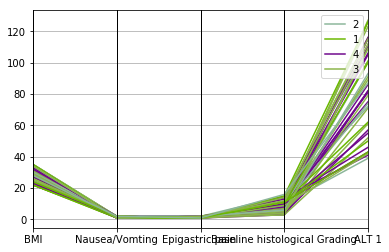

In [95]:
from pandas.plotting import parallel_coordinates
%matplotlib inline
#figure(figsize=(50,70))

parallel_coordinates(selected_data, 'Baselinehistological staging')